# A minimal plot example

First, we load intake for data loading and easygems.healpix for a simple plot function.
Then, we load the catalog and print our way through the hierarchy.
Finally, we load and plot the data.

In [1]:
import intake
from easygems import healpix as egh

In [2]:
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")
list (cat)

['EU', 'NERSC', 'NCAR', 'online']

In [3]:
list (cat["online"])

['ERA5',
 'JRA3Q',
 'MERRA2',
 'icon_d3hp003',
 'icon_ngc4008',
 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_glm_n1280_CoMA9',
 'um_glm_n1280_GAL9',
 'um_glm_n2560_RAL3p3']

In [4]:
ds = cat["online.icon_d3hp003"](zoom=7).to_dask() # most datasets have a zoom parameter. Use .describe() on a dateset to see the other parameter options
ds

/Users/flo/python_envs/miniconda3/envs/easy/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 85GB
Dimensions:       (crs: 1, time: 425, cell: 196608, pressure: 30,
                   pressure_rva: 3)
Coordinates:
  * crs           (crs) float32 4B nan
  * pressure      (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva  (pressure_rva) int64 24B 16 18 23
  * time          (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/23)
    egpvi         (time, cell) float32 334MB ...
    einvi         (time, cell) float32 334MB ...
    ekhvi         (time, cell) float32 334MB ...
    ekvvi         (time, cell) float32 334MB ...
    hur           (time, pressure, cell) float32 10GB ...
    hus           (time, pressure, cell) float32 10GB ...
    ...            ...
    ua            (time, pressure, cell) float32 10GB ...
    uas           (time, cell) float32 334MB ...
    va            (time, pressure, cell) float32 10GB ...
    vas           (time, cell) float32 334MB ...
    wa            (time, pressure, cell) float32 10GB ...
    zg            (time, pressure, cell) float32 10GB ...

<Figure size 640x480 with 0 Axes>

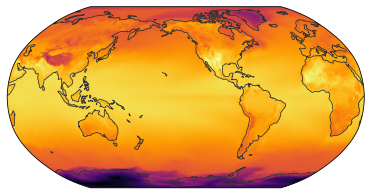

In [5]:
egh.healpix_show(ds["ts"].sel(time="2020-05-10T00:00:00"), cmap="inferno", dpi=72)